<a href="https://colab.research.google.com/github/pusatalamsemestaa/Machine-Learning/blob/main/week4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Iris.csv')
df.head()

Saving Iris.csv to Iris (2).csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


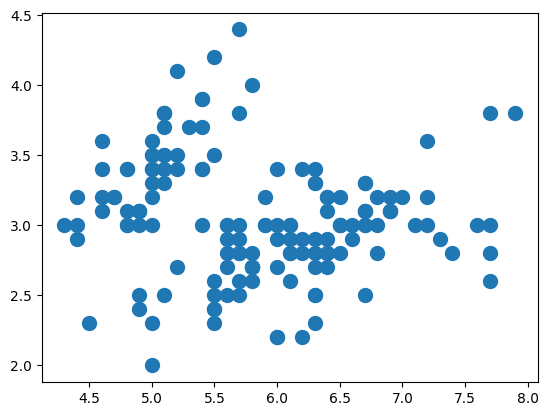

In [3]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [4]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

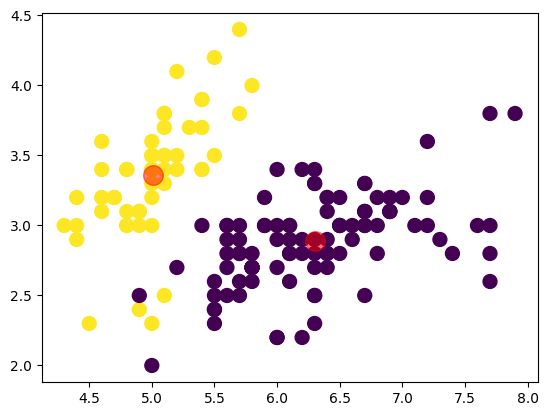

In [5]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [6]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


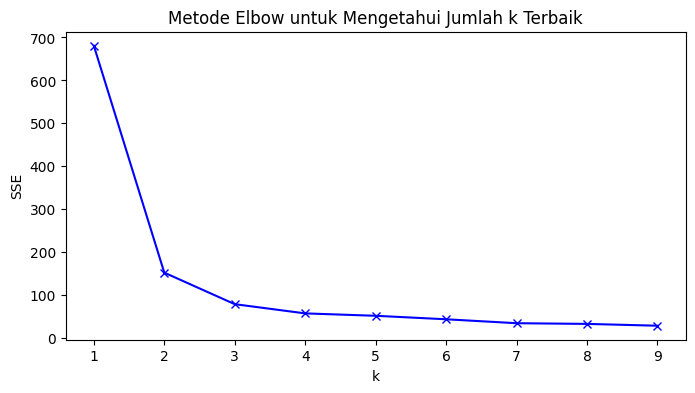

In [7]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [8]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94084142614601
k=4; SSE=57.4732732654949
k=5; SSE=51.89444347826087
k=6; SSE=43.76461544839106
k=7; SSE=34.63203543283341
k=8; SSE=33.00277966149128
k=9; SSE=28.76568576029447


# PRAKTIKUM 2

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Pengantar k-Means

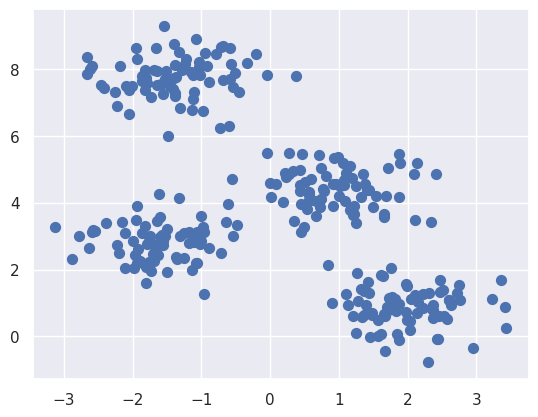

In [10]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

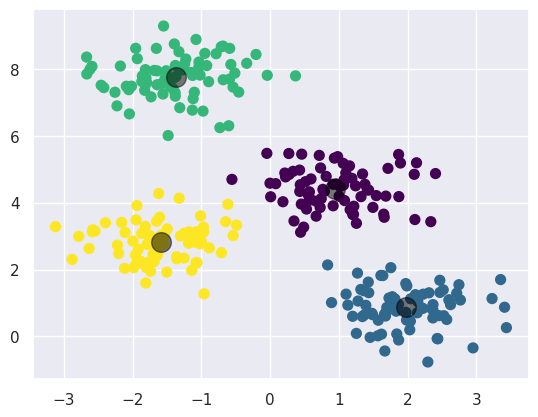

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## Algoritma Expectation-Maximization

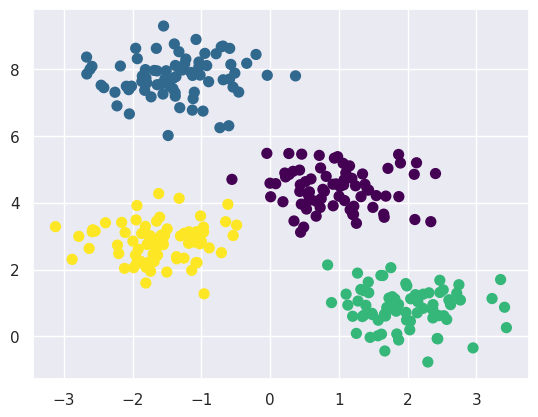

In [12]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

## Perubahan random

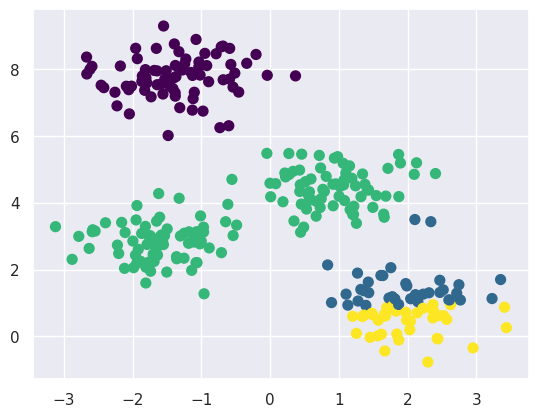

In [13]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

## Optimalisasi Jumlah Klaster

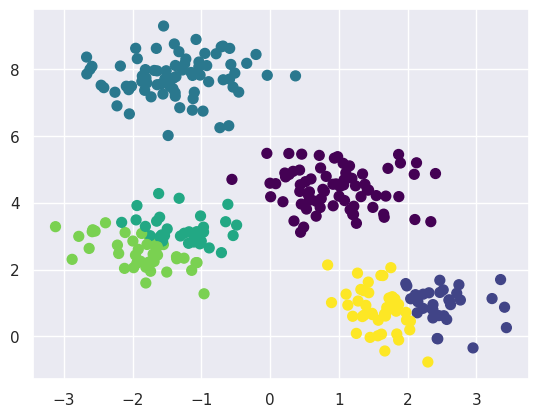

In [14]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

## Batas Klaster yang Tidak Selalu Linier

In [15]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

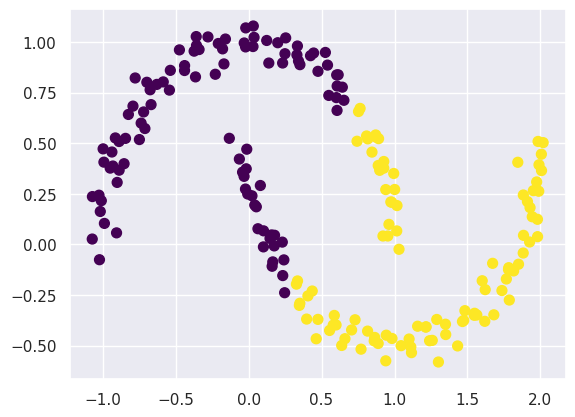

In [16]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


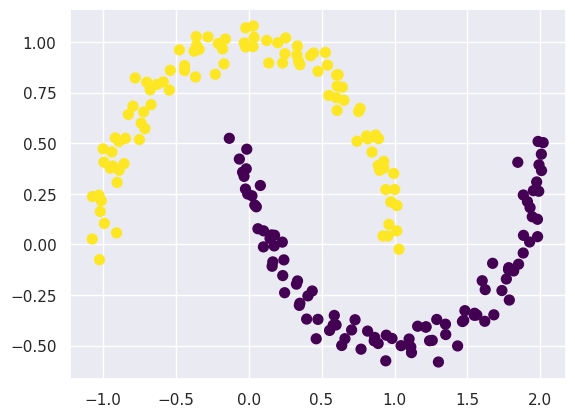

In [17]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

## Contoh kasus 1: Karakter Angka

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [19]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

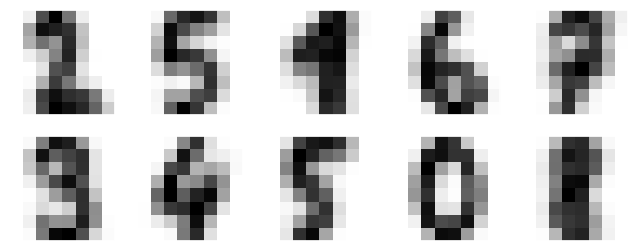

In [20]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [21]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

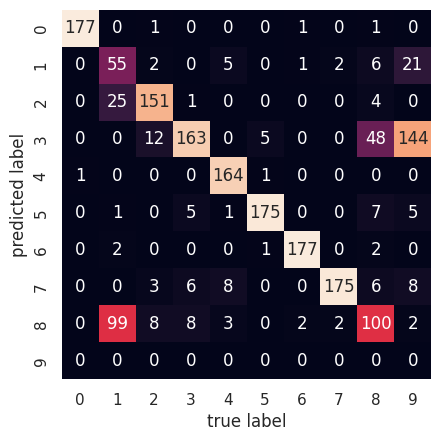

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [24]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

## Studi kasus 2: Kompresi Citra

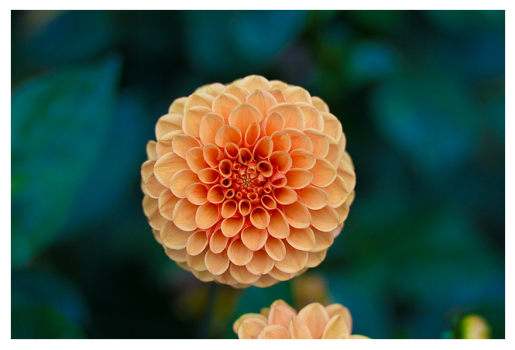

In [25]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [26]:
flower.shape

(427, 640, 3)

In [27]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [28]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

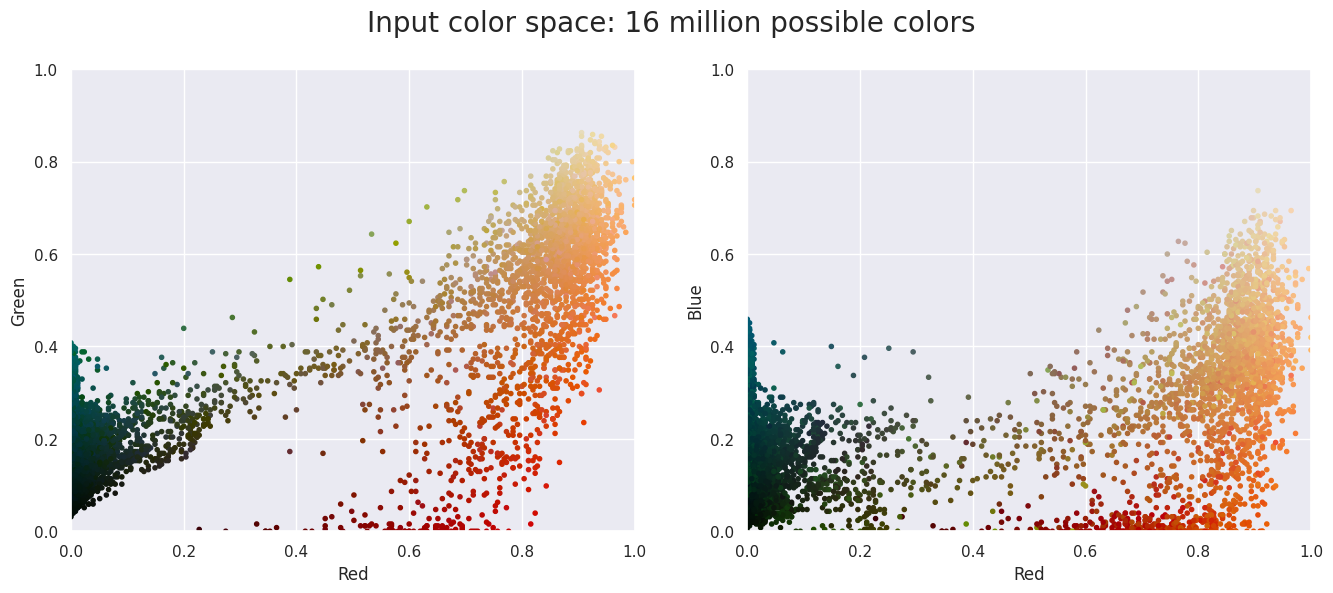

In [29]:
plot_pixels(data, title='Input color space: 16 million possible colors')

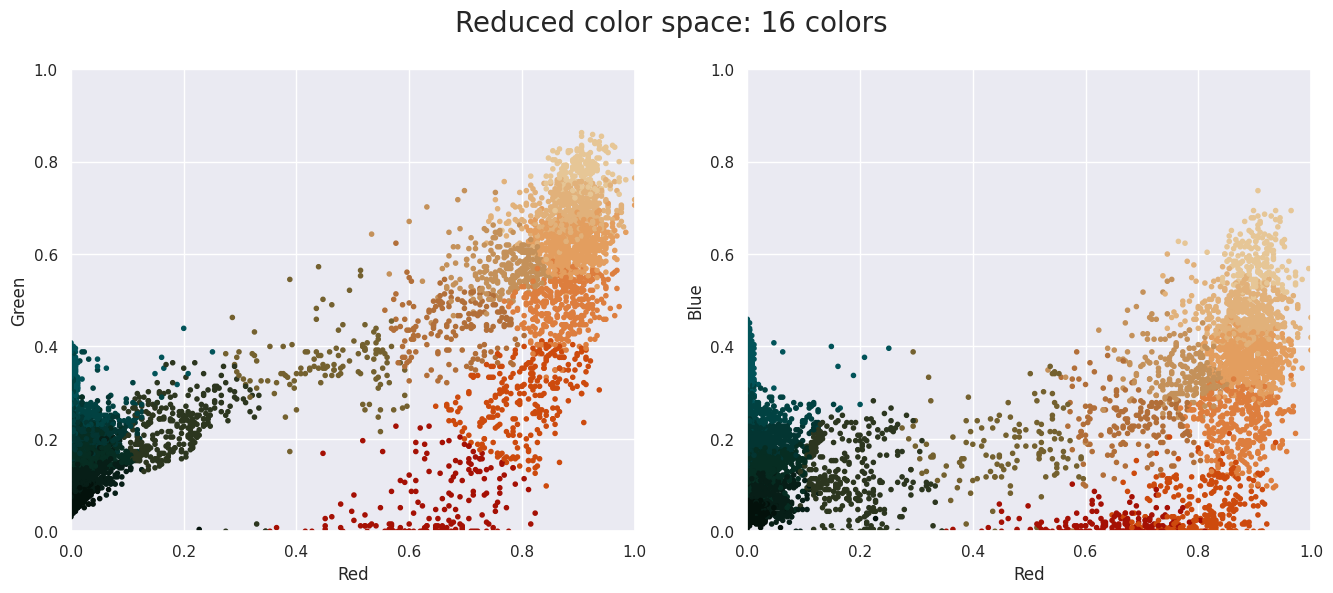

In [30]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

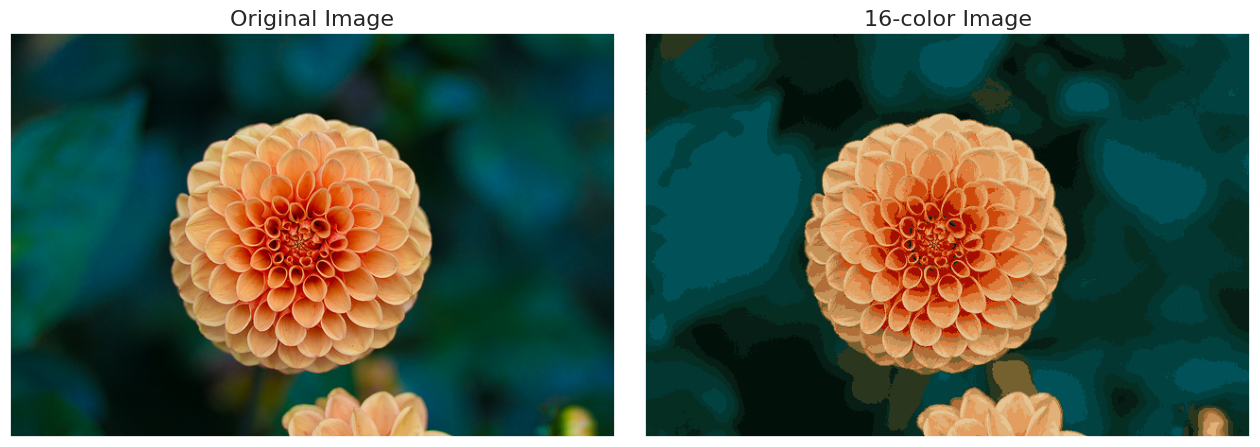

In [31]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# PRAKTIKUM 3

## Pembuatan Dataset Sintesis

In [37]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

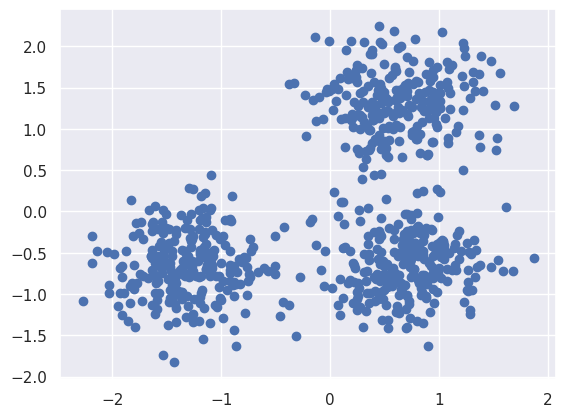

In [38]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Compute DBSCAN

In [40]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN (eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


## Evaluasi Kualitas Klasterisasi

In [44]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


## Visualisasi Hasil Klasterisasi

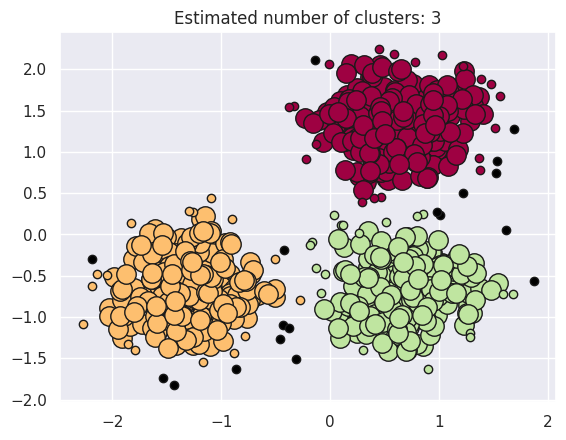

In [43]:
import numpy as np
import matplotlib.pyplot as plt

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# Tugas Praktikum

## 1. Tugas K-Means

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Mall_Customers.csv')
df.head()

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


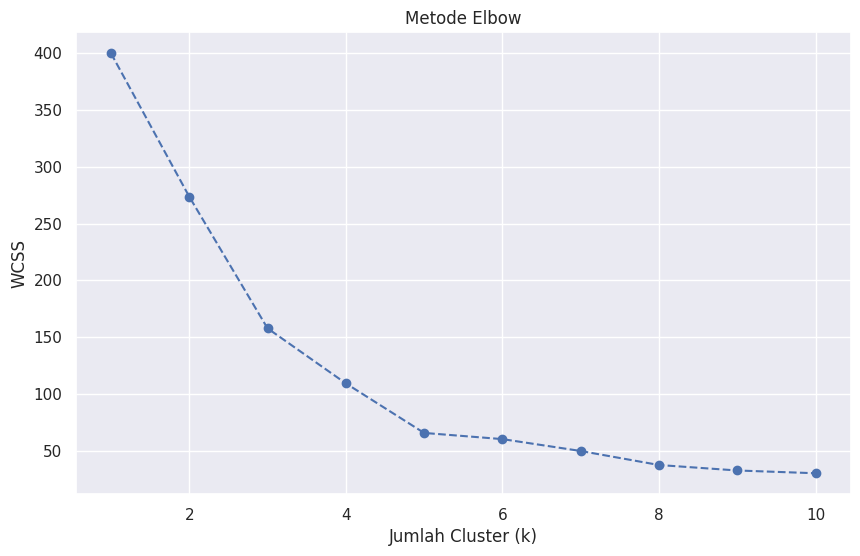

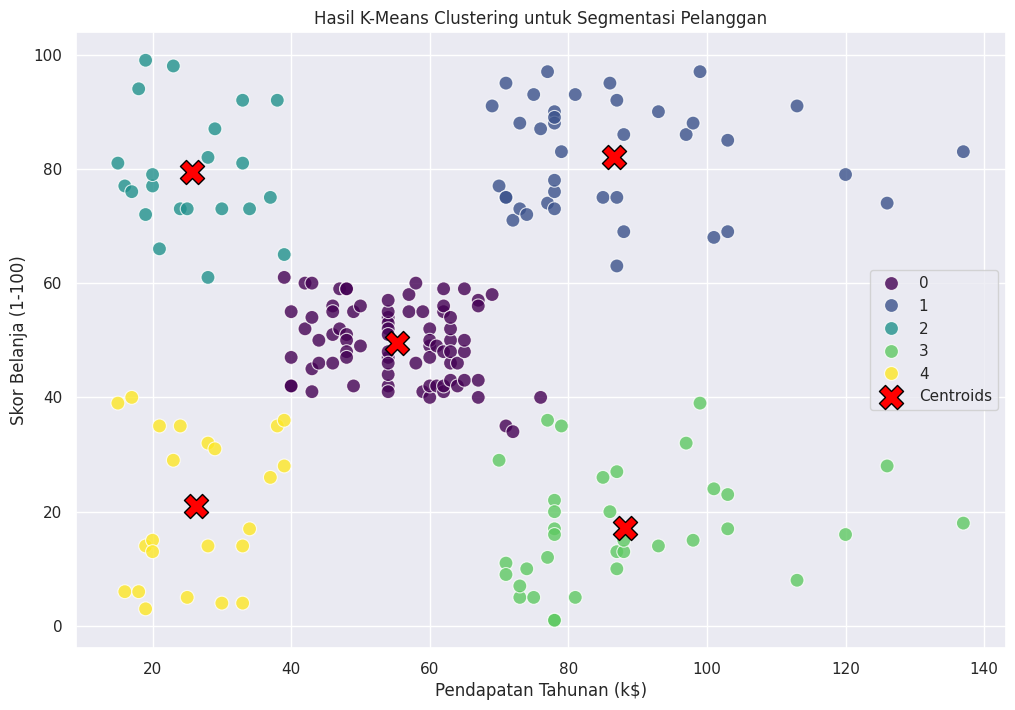

--- Ringkasan Hasil Clustering ---
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [48]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
try:
    df = pd.read_csv('Mall_Customers.csv')
except FileNotFoundError:
    print("Error: File 'Mall_Customers.csv' tidak ditemukan. Pastikan file berada di direktori yang sama.")
    exit()

# 2. Menentukan fitur untuk clustering
# Fitur 'Annual Income (k$)' dan 'Spending Score (1-100)' sangat relevan
# untuk segmentasi pelanggan berdasarkan daya beli dan perilaku belanja.
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standarisasi fitur agar skala data seragam
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Menentukan jumlah k terbaik menggunakan Metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Metode Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Berdasarkan visualisasi elbow, 'siku' yang paling jelas berada di k=5
# Maka, kita gunakan k=5 sebagai jumlah cluster terbaik.
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8)

# Menambahkan centroid ke dalam plot
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids', edgecolor='black')

plt.title('Hasil K-Means Clustering untuk Segmentasi Pelanggan')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Belanja (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# Menampilkan ringkasan hasil
print("--- Ringkasan Hasil Clustering ---")
print(df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

## 2. Tugas DBSCAN

1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

Bentuk dataset (X): (1000, 2)
Bentuk label (y): (1000,)


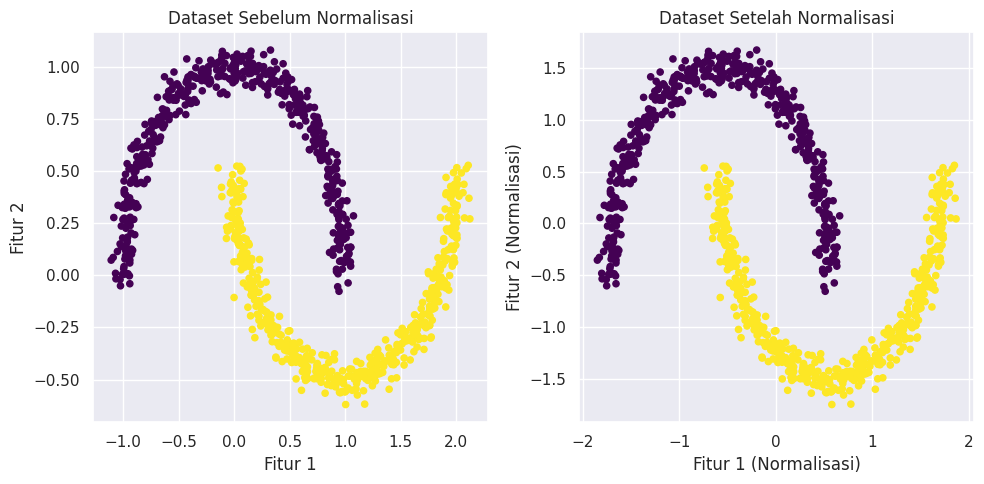


Nilai rata-rata (mean) setelah normalisasi: [-2.45969911e-16 -3.07642800e-16]
Nilai deviasi standar (std) setelah normalisasi: [1. 1.]


In [49]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Membuat dataset make_moons
n_samples = 1000
noise = 0.05
X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)

print("Bentuk dataset (X):", X.shape)
print("Bentuk label (y):", y.shape)

# Visualisasi dataset sebelum normalisasi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=20)
plt.title('Dataset Sebelum Normalisasi')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')

# 2. Normalisasi dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Visualisasi dataset setelah normalisasi
plt.subplot(1, 2, 2)
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y, cmap='viridis', s=20)
plt.title('Dataset Setelah Normalisasi')
plt.xlabel('Fitur 1 (Normalisasi)')
plt.ylabel('Fitur 2 (Normalisasi)')

plt.tight_layout()
plt.show()

print("\nNilai rata-rata (mean) setelah normalisasi:", X_normalized.mean(axis=0))
print("Nilai deviasi standar (std) setelah normalisasi:", X_normalized.std(axis=0))

2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

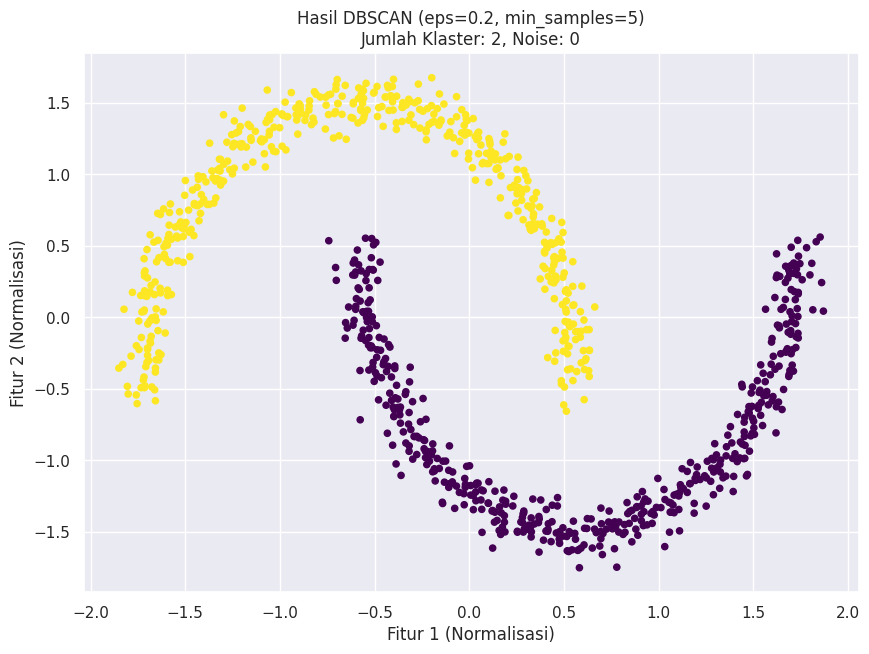

Jumlah klaster yang ditemukan: 2
Jumlah titik data yang dianggap noise: 0


In [50]:

# Buat dataset make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

# Jalankan DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Hitung jumlah klaster dan noise
n_clusters = len(np.unique(clusters[clusters != -1]))
n_noise = np.sum(clusters == -1)

# Visualisasi
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=20)
plt.title(f'Hasil DBSCAN (eps=0.2, min_samples=5)\nJumlah Klaster: {n_clusters}, Noise: {n_noise}')
plt.xlabel('Fitur 1 (Normalisasi)')
plt.ylabel('Fitur 2 (Normalisasi)')
plt.show()

print(f'Jumlah klaster yang ditemukan: {n_clusters}')
print(f'Jumlah titik data yang dianggap noise: {n_noise}')

3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

In [51]:

# Buat dataset make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

# Jalankan DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Metrik Evaluasi
homogeneity = metrics.homogeneity_score(y, labels)
completeness = metrics.completeness_score(y, labels)
v_measure = metrics.v_measure_score(y, labels)
ari = metrics.adjusted_rand_score(y, labels)
ami = metrics.adjusted_mutual_info_score(y, labels)
silhouette = metrics.silhouette_score(X_scaled, labels)

# Cetak hasil
print(f"Homogeneity: {homogeneity:.4f}")
print(f"Completeness: {completeness:.4f}")
print(f"V-measure: {v_measure:.4f}")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Adjusted Mutual Information (AMI): {ami:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")

Homogeneity: 1.0000
Completeness: 1.0000
V-measure: 1.0000
Adjusted Rand Index (ARI): 1.0000
Adjusted Mutual Information (AMI): 1.0000
Silhouette Score: 0.3912


4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

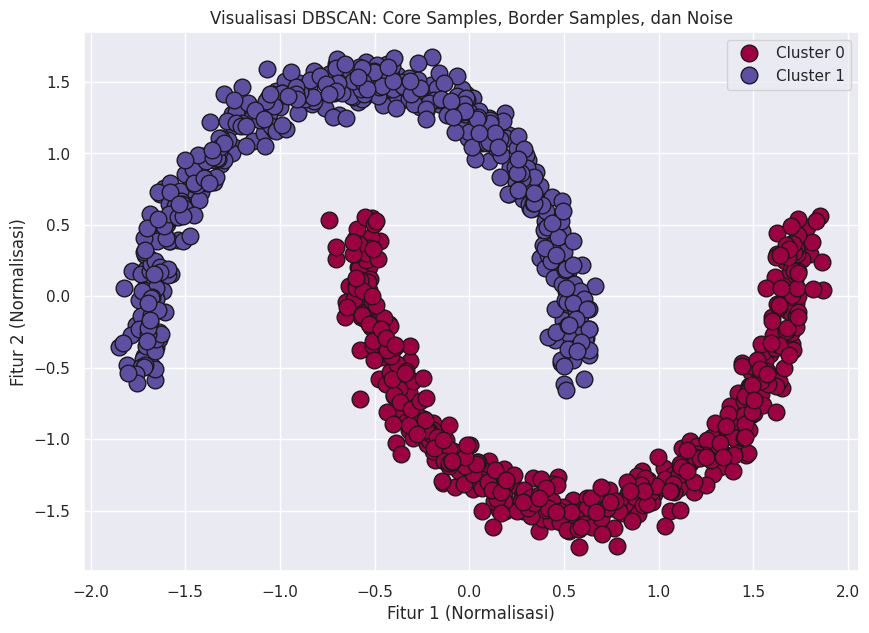

In [52]:

# 1. Buat dataset make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

# 2. Jalankan DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# 3. Visualisasikan hasil DBSCAN
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(10, 7))

# Loop melalui setiap klaster untuk visualisasi
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise, diwakili oleh warna hitam
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples sebagai titik besar
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=12, label=f'Cluster {k}' if k != -1 else 'Noise')

    # Plot non-core (border) samples sebagai titik kecil
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Visualisasi DBSCAN: Core Samples, Border Samples, dan Noise')
plt.xlabel('Fitur 1 (Normalisasi)')
plt.ylabel('Fitur 2 (Normalisasi)')
plt.legend()
plt.show()


5. Lakukan eksperimen:

*eps = 0.05, 0.1, 0.3, 0.5*
*min_samples = 3, 10, 20*

Catat perubahan klaster, noise, dan kualitas evaluasi.

In [53]:

# Buat dan normalisasi dataset
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        n_clusters = len(np.unique(labels[labels != -1]))
        n_noise = np.sum(labels == -1)

        # Hitung metrik evaluasi, lewati jika hanya ada noise atau satu cluster
        if n_clusters < 2:
            homogeneity, completeness, v_measure, ari, ami, silhouette = [np.nan] * 6
        else:
            homogeneity = metrics.homogeneity_score(y, labels)
            completeness = metrics.completeness_score(y, labels)
            v_measure = metrics.v_measure_score(y, labels)
            ari = metrics.adjusted_rand_score(y, labels)
            ami = metrics.adjusted_mutual_info_score(y, labels)
            silhouette = metrics.silhouette_score(X_scaled, labels)

        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'homogeneity': homogeneity,
            'completeness': completeness,
            'v_measure': v_measure,
            'ari': ari,
            'ami': ami,
            'silhouette': silhouette
        })

results_df = pd.DataFrame(results)
print(results_df)


     eps  min_samples  n_clusters  n_noise  homogeneity  completeness  \
0   0.05            3          69      186     0.815554      0.152548   
1   0.05           10           3      970     0.030669      0.126764   
2   0.05           20           0     1000          NaN           NaN   
3   0.10            3           2       14     0.986207      0.902896   
4   0.10           10           7       57     0.943317      0.409546   
5   0.10           20           6      850     0.153928      0.155466   
6   0.30            3           2        0     1.000000      1.000000   
7   0.30           10           2        0     1.000000      1.000000   
8   0.30           20           2        0     1.000000      1.000000   
9   0.50            3           2        0     1.000000      1.000000   
10  0.50           10           2        0     1.000000      1.000000   
11  0.50           20           2        0     1.000000      1.000000   

    v_measure       ari       ami  silhouette  
0 